In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import KFold 
from sklearn import metrics
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
lbn=LabelEncoder()


In [2]:
lbn=LabelEncoder()

In [3]:
df1=pd.read_excel(r'C:\Users\kiranpal\OneDrive\Attachments\OneDrive\Desktop\Data_Test.xls')
df1.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [4]:
df2=pd.read_excel(r'C:\Users\kiranpal\OneDrive\Attachments\OneDrive\Desktop\Data_Train.xls')
df2.head(5)

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

In [5]:
df3=pd.read_excel(r'C:\Users\kiranpal\OneDrive\Attachments\OneDrive\Desktop\Sample_submission.xls')
df3.head()

Price
0  55.02
1  56.46
2  34.61
3  16.89
4  50.48

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


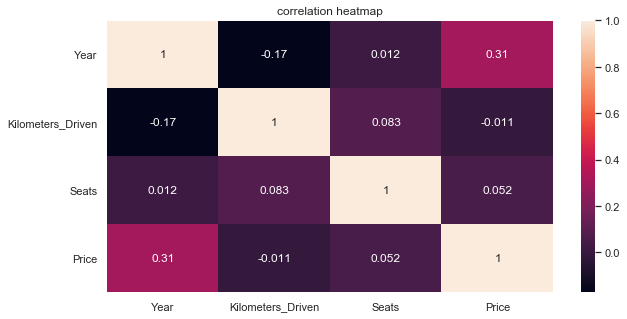

In [7]:
cr=df2.corr()
plt.figure(figsize=(10,5))
sb.set(style='darkgrid')
sb.heatmap(cr,annot=True)
plt.title('correlation heatmap')
plt.show()


In [8]:
df2.describe()

Year  Kilometers_Driven        Seats        Price
count  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   2013.358199       5.873838e+04     5.278735     9.479468
std       3.269742       9.126884e+04     0.808840    11.187917
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000

In [9]:
df2.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [10]:
[df2.iloc[i,j] for i,j in zip(*np.where(pd.isnull(df2)))]


[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [11]:
np.where(pd.isnull(df2))  #returns the row and column indices where the value is NaN:

(array([   0,    1,    3, ..., 6016, 6017, 6018], dtype=int64),
 array([11, 11, 11, ..., 11, 11, 11], dtype=int64))

In [12]:
np.where(df2.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [13]:
ls=[]
ls.append(df2.columns)
for a in ls:
    df2[df2[a] == ''].index

In [14]:
df2['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [15]:
for i in df2['Name']:
    if i=='Null ':
        print("i is :",i)
for j in df2["Name"]:
    if i=='nan ':
        print("j is:",j)
for k in df2['Name']:
    if k=='':
        print("k is:",k)
for l in df2['Name']:
    if l=='NaN':
        print('l is:',l)
for m in df2['Name']:
    if m=='nan':
        print("m is:",m)
        

In [16]:
df2[df2['Name'].isna()]

Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price]
Index: []

In [17]:
df2['Name']=lbn.fit_transform(df2['Name'])

In [18]:
df2['Name'].head()

0    1200
1     512
2     486
3    1059
4      23
Name: Name, dtype: int32

In [19]:

print(df2['Location'].isnull().sum().sum())


0


In [20]:
for i in df2['Location']:
    if i=='Null ':
        print("i is :",i)
for j in df2['Location']:
    if i=='nan ':
        print("j is:",j)
for k in df2['Location']:
    if k=='':
        print("k is:",k)
for l in df2['Location']:
    if l=='NaN':
        print('l is:',l)
for m in df2['Location']:
    if m=='nan':
        print("m is:",m)
        

In [21]:
df2['Location']=lbn.fit_transform(df2['Location'])
df2['Location'].head()

0     9
1    10
2     2
3     2
4     3
Name: Location, dtype: int32

In [22]:
print(df2['Fuel_Type'].unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [23]:
df2[df2['Fuel_Type'].isna()]

Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price]
Index: []

In [24]:
for i in df2['Fuel_Type']:
    if i=='Null ':
        print("i is :",i)
for j in df2['Fuel_Type']:
    if i=='nan ':
        print("j is:",j)
for k in df2['Fuel_Type']:
    if k=='':
        print("k is:",k)
for l in df2['Fuel_Type']:
    if l=='NaN':
        print('l is:',l)
for m in df2['Fuel_Type']:
    if m=='nan':
        print("m is:",m)
        

In [25]:
print(df2['Fuel_Type'].isnull().sum().sum())
df2['Fuel_Type']=lbn.fit_transform(df2['Fuel_Type'])
df2['Fuel_Type'].head()

0


0    0
1    1
2    4
3    1
4    1
Name: Fuel_Type, dtype: int32

In [26]:
print(df2['Transmission'].unique())
print(df2['Transmission'].isnull().sum().sum())

['Manual' 'Automatic']
0


In [27]:
for i in df2['Transmission']:
    if i=='Null ':
        print("i is :",i)
for j in df2['Transmission']:
    if i=='nan ':
        print("j is:",j)
for k in df2['Transmission']:
    if k=='':
        print("k is:",k)
for l in df2['Transmission']:
    if l=='NaN':
        print('l is:',l)
for m in df2['Transmission']:
    if m=='nan':
        print("m is:",m)
        

In [28]:
df2['Transmission']=lbn.fit_transform(df2['Transmission'])
df2['Transmission'].head()

0    1
1    1
2    1
3    1
4    0
Name: Transmission, dtype: int32

In [29]:
print(df2['Owner_Type'].unique())
print(df2['Owner_Type'].isnull().sum().sum())

['First' 'Second' 'Fourth & Above' 'Third']
0


In [30]:
for i in df2['Owner_Type']:
    if i=='Null ':
        print("i is :",i)
for j in df2['Owner_Type']:
    if i=='nan ':
        print("j is:",j)
for k in df2['Owner_Type']:
    if k=='':
        print("k is:",k)
for l in df2['Owner_Type']:
    if l=='NaN':
        print('l is:',l)
for m in df2['Owner_Type']:
    if m=='nan':
        print("m is:",m)
        

In [31]:
df2['Owner_Type']=lbn.fit_transform(df2['Owner_Type'])
df2['Owner_Type'].head()

0    0
1    0
2    0
3    0
4    2
Name: Owner_Type, dtype: int32

In [32]:
df2.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [33]:
df2['Mileage'].isnull().sum().sum()

2

In [34]:
for i in df2["Mileage"]:
    if i=='Null ':
        print("i is :",i)
for j in df2['Mileage']:
    if i=='nan ':
        print("j is:",j)
for k in df2['Mileage']:
    if k=='':
        print("k is:",k)
for l in df2['Mileage']:
    if l=='NaN':
        print('l is:',l)
for m in df2['Mileage']:
    if m=='nan':
        print("m is:",m)
        

In [35]:
df2[df2['Mileage'].isnull()]

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
4446   836         2  2016              50000          2             0   
4904  1781         9  2011              44000          2             0   

      Owner_Type Mileage   Engine   Power  Seats   New_Price  Price  
4446           0     NaN    72 CC  41 bhp    5.0  13.58 Lakh  13.00  
4904           0     NaN  1798 CC  73 bhp    5.0         NaN  12.75

In [36]:
df2['Mileage'].head()

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

In [37]:
df2['Mileage']=df2['Mileage'].str.replace('km/kg','',case=False)
df2['Mileage']=df2['Mileage'].str.replace('kmpl','',case=False)
df2['Mileage']=df2['Mileage'].astype(float)

In [38]:
df2['Mileage'].isnull().sum().sum()

2

In [39]:
df2['Mileage']=df2['Mileage'].fillna(value=df2['Mileage'].mean())

In [40]:
df2['Mileage'].isnull().sum().sum()

0

In [41]:
df2['Engine'].head()

0     998 CC
1    1582 CC
2    1199 CC
3    1248 CC
4    1968 CC
Name: Engine, dtype: object

In [42]:
df2["Engine"]= df2["Engine"].str.replace("CC", "", case = False) 
df2['Engine']=df2['Engine'].astype(float)

In [43]:
df2['Engine'].isna().sum().sum()

36

In [44]:
for i in df2['Engine']:
    if i=='Null ':
        print("i is :",i)
for j in df2['Engine']:
    if i=='nan ':
        print("j is:",j)
for k in df2['Engine']:
    if k=='':
        print("k is:",k)
for l in df2['Engine']:
    if l=='NaN':
        print('l is:',l)
for m in df2['Engine']:
    if m=='nan':
        print("m is:",m)
        

In [45]:
df2[df2['Engine'].isna()].head(2)

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
194   417         0  2007              60006          4             1   
208  1120         8  2010              42001          4             1   

     Owner_Type  Mileage  Engine Power  Seats New_Price  Price  
194           0      0.0     NaN   NaN    NaN       NaN   2.95  
208           0     16.1     NaN   NaN    NaN       NaN   2.11

In [46]:
df2['Engine']=df2['Engine'].fillna(value=df2['Engine'].mean())

In [47]:
df2['Engine'].isnull().sum().sum()

0

In [48]:
df1['Power'].head()

0     58.2 bhp
1     47.3 bhp
2    147.8 bhp
3     null bhp
4    82.85 bhp
Name: Power, dtype: object

In [49]:
df2["Power"]= df2["Power"].str.replace("bhp", "", case = False) 

In [50]:
for i in df2['Power']:
    if i=='null ':
        print("i is :",i)
for j in df2['Power']:
    if i=='nan ':
        print("j is:",j)
for k in df2['Power']:
    if k=='':
        print("k is:",k)
for l in df2['Power']:
    if l=='NaN':
        print('l is:',l)
for m in df2['Power']:
    if m=='nan':
        print("m is:",m)
        

i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 
i is : null 

In [51]:
df2['Power'].isnull().sum().sum()
    

36

In [52]:
df2[df2['Power'].isna()].head(2)

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
194   417         0  2007              60006          4             1   
208  1120         8  2010              42001          4             1   

     Owner_Type  Mileage      Engine Power  Seats New_Price  Price  
194           0      0.0  1621.27645   NaN    NaN       NaN   2.95  
208           0     16.1  1621.27645   NaN    NaN       NaN   2.11

In [53]:
df2.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [54]:
df2['Power'] = df2['Power'].replace('null ',np.nan,regex=True)

In [55]:
#df2['Power']=df2['Power'].str.replace('null ',str(np.nan),case=True)


In [56]:
df2['Power'].isnull().sum().sum()


143

In [57]:
df2['Power']=df2['Power'].astype(float)

In [58]:
df2['Power']=df2['Power'].fillna(value=df2['Power'].mean())

In [59]:
df2['Power'].isnull().sum().sum()


0

In [60]:
df2['Power'].mean()

113.25304969366813

In [61]:
df2.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price             object
Price                float64
dtype: object

In [62]:
df2['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [63]:
df2[df2['Seats'].isna()].head()

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
194   417         0  2007              60006          4             1   
208  1120         8  2010              42001          4             1   
229   324         1  2015              70436          1             1   
733  1120         2  2006              97800          4             1   
749   814         9  2008              55001          1             0   

     Owner_Type  Mileage      Engine      Power  Seats New_Price  Price  
194           0      0.0  1621.27645  113.25305    NaN       NaN   2.95  
208           0     16.1  1621.27645  113.25305    NaN       NaN   2.11  
229           0      0.0  1498.00000   99.00000    NaN       NaN   3.60  
733           3     16.1  1621.27645  113.25305    NaN       NaN   1.75  
749           2      0.0  1621.27645  113.25305    NaN       NaN  26.50

In [64]:
for i in df2['Seats']:
    if i=='null ':
        print("i is :",i)
for j in df2['Seats']:
    if i=='nan ':
        print("j is:",j)
for k in df2['Seats']:
    if k=='':
        print("k is:",k)
for l in df2['Seats']:
    if l=='NaN':
        print('l is:',l)
for m in df2['Seats']:
    if m=='nan':
        print("m is:",m)
        

In [65]:
df2['Seats']=df2['Seats'].fillna(value=df2['Seats'].mean())

In [66]:
df2['Seats'].isna().sum().sum()

0

In [67]:
df2['New_Price'].head()

0          NaN
1          NaN
2    8.61 Lakh
3          NaN
4          NaN
Name: New_Price, dtype: object

In [68]:
df2['New_Price']=df2['New_Price'].str.replace('Lakh','')


In [69]:
for i in df2['New_Price']:
    if i=='null ':
        print("i is :",i)
for j in df2['New_Price']:
    if i=='nan ':
        print("j is:",j)
for k in df2['New_Price']:
    if k=='':
        print("k is:",k)
for l in df2['New_Price']:
    if l=='NaN':
        print('l is:',l)
for m in df2['New_Price']:
    if m=='nan':
        print("m is:",m)
        

In [70]:
df2['New_Price'] = pd.to_numeric(df2['New_Price'],errors='coerce')

In [71]:
x=0
for i in df2['New_Price']:
    if i=='' or i=='NaN':
        x=x+1
    
print(x)    

0


In [72]:
df2['New_Price']=df2['New_Price'].fillna(value=df2['New_Price'].mean())

In [73]:
df2['New_Price'].isna().sum().sum()

0

In [74]:
#df2['Transmission']=df2['Transmission'].replace({'Manual':0,'Automatic':1})

In [75]:
df2['New_Price'].head()

0    20.720372
1    20.720372
2     8.610000
3    20.720372
4    20.720372
Name: New_Price, dtype: float64

In [76]:
df2.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [77]:
df2.head()

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0  1200         9  2010              72000          0             1   
1   512        10  2015              41000          1             1   
2   486         2  2011              46000          4             1   
3  1059         2  2012              87000          1             1   
4    23         3  2013              40670          1             0   

   Owner_Type  Mileage  Engine   Power  Seats  New_Price  Price  
0           0    26.60   998.0   58.16    5.0  20.720372   1.75  
1           0    19.67  1582.0  126.20    5.0  20.720372  12.50  
2           0    18.20  1199.0   88.70    5.0   8.610000   4.50  
3           0    20.77  1248.0   88.76    7.0  20.720372   6.00  
4           2    15.20  1968.0  140.80    5.0  20.720372  17.74

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null int32
Location             6019 non-null int32
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null int32
Transmission         6019 non-null int32
Owner_Type           6019 non-null int32
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                6019 non-null float64
New_Price            6019 non-null float64
Price                6019 non-null float64
dtypes: float64(6), int32(5), int64(2)
memory usage: 493.8 KB


In [79]:
df2.describe()

Name     Location         Year  Kilometers_Driven    Fuel_Type  \
count  6019.000000  6019.000000  6019.000000       6.019000e+03  6019.000000   
mean    915.975577     5.619704  2013.358199       5.873838e+04     2.363017   
std     529.812042     2.955933     3.269742       9.126884e+04     1.504939   
min       0.000000     0.000000  1998.000000       1.710000e+02     0.000000   
25%     472.000000     3.000000  2011.000000       3.400000e+04     1.000000   
50%     924.000000     6.000000  2014.000000       5.300000e+04     1.000000   
75%    1314.000000     8.000000  2016.000000       7.300000e+04     4.000000   
max    1875.000000    10.000000  2019.000000       6.500000e+06     4.000000   

       Transmission   Owner_Type      Mileage       Engine        Power  \
count   6019.000000  6019.000000  6019.000000  6019.000000  6019.000000   
mean       0.714238     0.379465    18.134961  1621.276450   113.253050   
std        0.451814     0.818458     4.581528   599.553865    53.231019   
min        0.000000     0.000000     0.000000    72.000000    34.200000   
25%        0.000000     0.000000    15.170000  1198.000000    78.000000   
50%        1.000000     0.000000    18.150000  1493.000000    98.600000   
75%        1.000000     0.000000    21.100000  1969.000000   138.030000   
max        1.000000     3.000000    33.540000  5998.000000   560.000000   

             Seats    New_Price        Price  
count  6019.000000  6019.000000  6019.000000  
mean      5.278735    20.720372     9.479468  
std       0.806012     7.399542    11.187917  
min       0.000000     3.910000     0.440000  
25%       5.000000    20.720372     3.500000  
50%       5.000000    20.720372     5.640000  
75%       5.000000    20.720372     9.950000  
max      10.000000    99.920000   160.000000

In [80]:
import seaborn as sb
x=df2.corr()
plt.figure(figsize=(10,5))
sb.set(style='darkgrid')
sb.heatmap(x,annot=True)
plt.title("correlation")
plt.show()

In [81]:
import seaborn as sb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR,NuSVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [82]:
df2.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

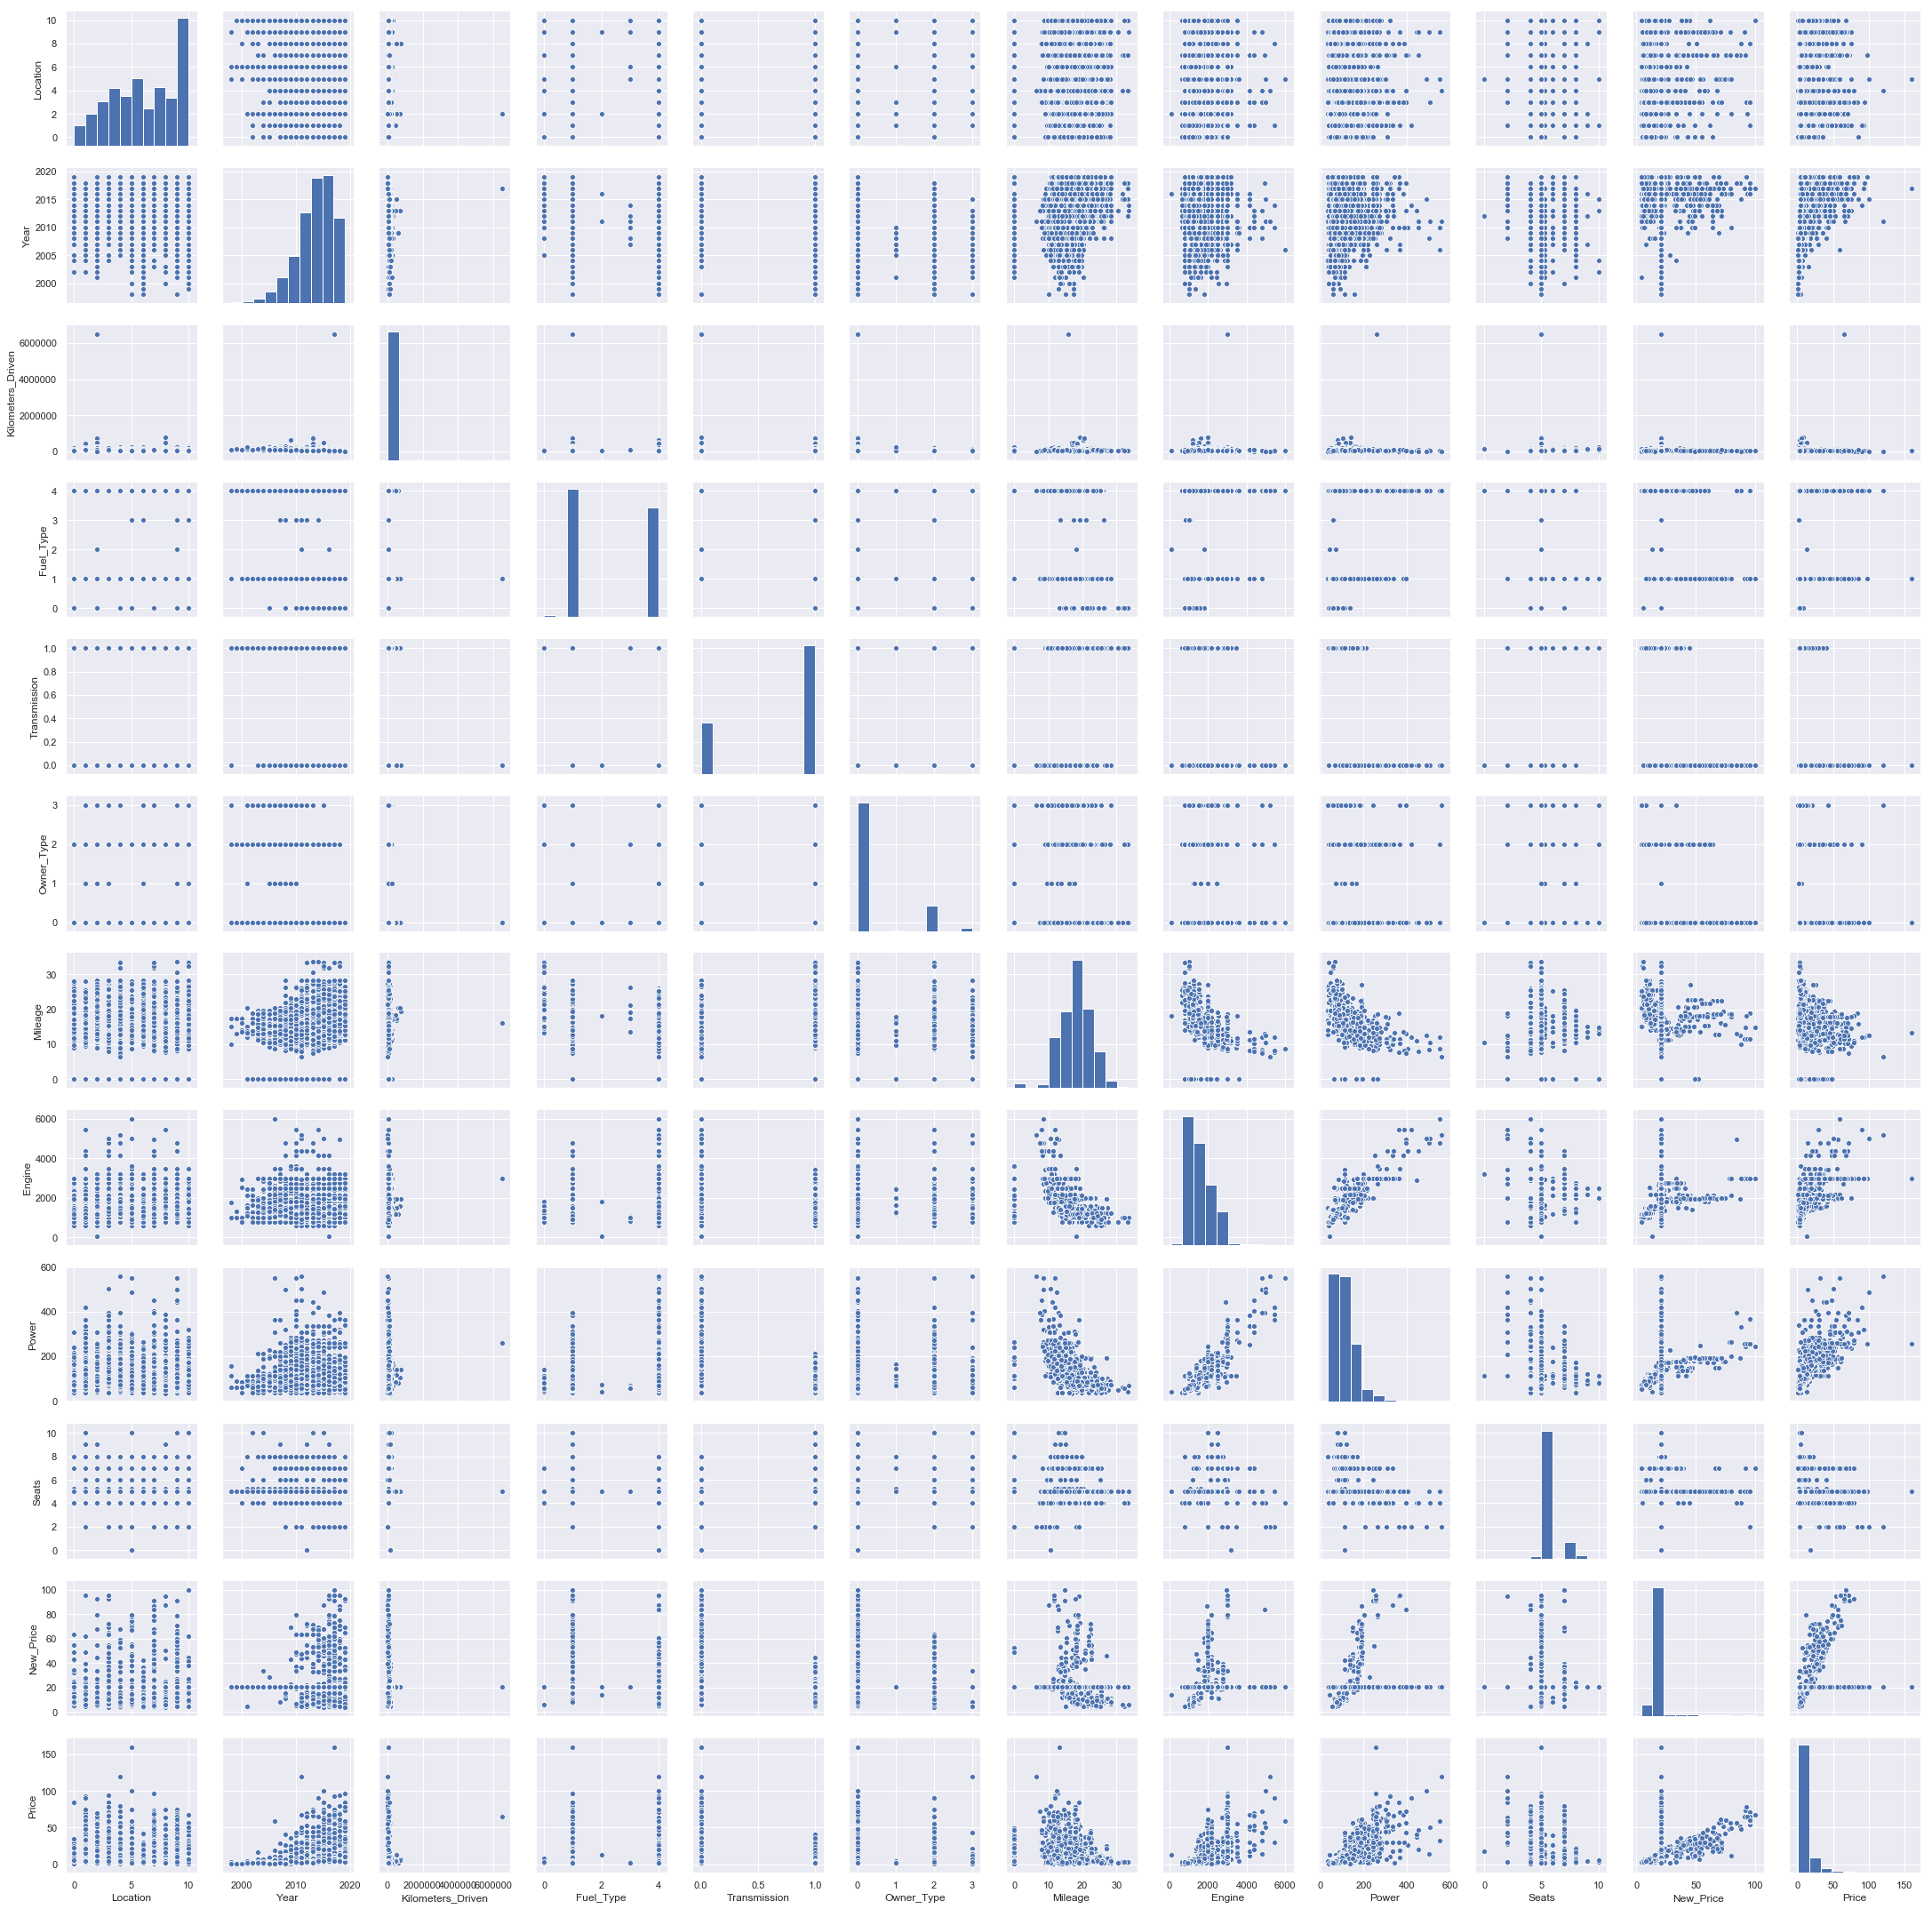

In [83]:
sb.pairplot(df2.iloc[:,1:])

In [84]:
col=df2.columns.tolist()

col

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [85]:
cr=df2.iloc[:,1:13].corr()
cr

Location      Year  Kilometers_Driven  Fuel_Type  \
Location           1.000000 -0.020117          -0.042751   0.115048   
Year              -0.020117  1.000000          -0.173048  -0.129526   
Kilometers_Driven -0.042751 -0.173048           1.000000  -0.102953   
Fuel_Type          0.115048 -0.129526          -0.102953   1.000000   
Transmission       0.040174 -0.097059           0.025663   0.125219   
Owner_Type        -0.033889 -0.386160           0.079924   0.043017   
Mileage            0.018773  0.321534          -0.065253  -0.152125   
Engine            -0.078302 -0.051712           0.091029  -0.401013   
Power             -0.064933  0.013895           0.033419  -0.263771   
Seats             -0.037234  0.012204           0.083072  -0.297950   
New_Price         -0.027011 -0.003262           0.000362  -0.131072   
Price             -0.116620  0.305327          -0.011493  -0.305207   

                   Transmission  Owner_Type   Mileage    Engine     Power  \
Location               0.040174   -0.033889  0.018773 -0.078302 -0.064933   
Year                  -0.097059   -0.386160  0.321534 -0.051712  0.013895   
Kilometers_Driven      0.025663    0.079924 -0.065253  0.091029  0.033419   
Fuel_Type              0.125219    0.043017 -0.152125 -0.401013 -0.263771   
Transmission           1.000000    0.003002  0.333096 -0.499082 -0.638835   
Owner_Type             0.003002    1.000000 -0.154188  0.048520  0.028608   
Mileage                0.333096   -0.154188  1.000000 -0.588354 -0.506801   
Engine                -0.499082    0.048520 -0.588354  1.000000  0.859020   
Power                 -0.638835    0.028608 -0.506801  0.859020  1.000000   
Seats                  0.075250    0.003698 -0.303086  0.393087  0.100200   
New_Price             -0.244969    0.003910 -0.132187  0.230822  0.303237   
Price                 -0.586025   -0.094559 -0.306588  0.657118  0.767331   

                      Seats  New_Price     Price  
Location          -0.037234  -0.027011 -0.116620  
Year               0.012204  -0.003262  0.305327  
Kilometers_Driven  0.083072   0.000362 -0.011493  
Fuel_Type         -0.297950  -0.131072 -0.305207  
Transmission       0.075250  -0.244969 -0.586025  
Owner_Type         0.003698   0.003910 -0.094559  
Mileage           -0.303086  -0.132187 -0.306588  
Engine             0.393087   0.230822  0.657118  
Power              0.100200   0.303237  0.767331  
Seats              1.000000  -0.004325  0.052118  
New_Price         -0.004325   1.000000  0.369912  
Price              0.052118   0.369912  1.000000

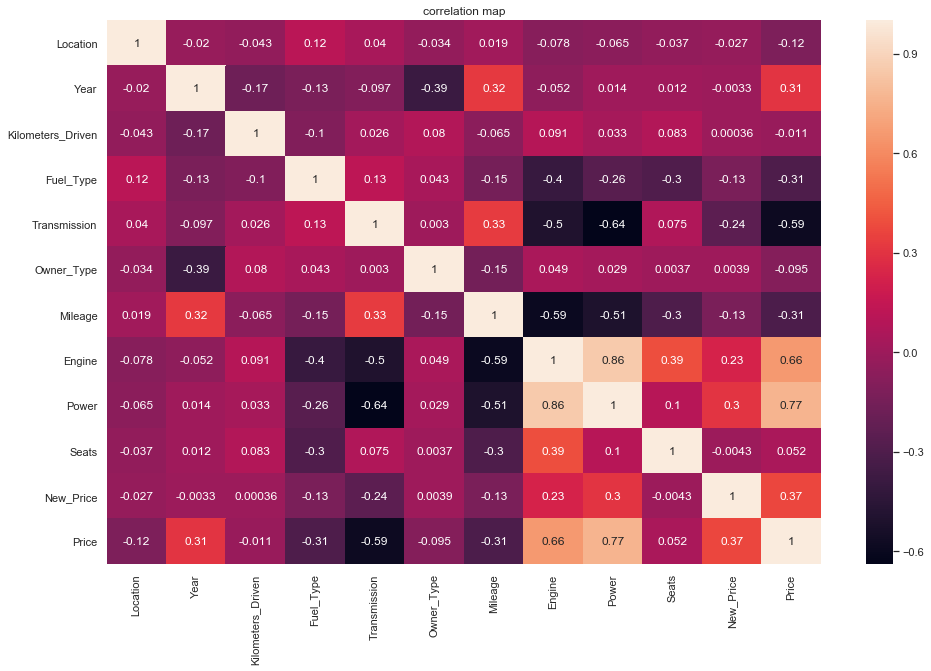

In [86]:
plt.figure(figsize=(16,10))
sb.set(style='darkgrid')
sb.heatmap(cr,annot=True)
plt.title('correlation map')
plt.show()

In [87]:
cr['Price']>0.5

Location             False
Year                 False
Kilometers_Driven    False
Fuel_Type            False
Transmission         False
Owner_Type           False
Mileage              False
Engine                True
Power                 True
Seats                False
New_Price            False
Price                 True
Name: Price, dtype: bool

In [88]:
I=df2.iloc[:,1:12]
O=df2.loc[:,['Price']]

In [89]:
O.head(2)


Price
0   1.75
1  12.50

In [90]:
I.head(2)

Location  Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type  \
0         9  2010              72000          0             1           0   
1        10  2015              41000          1             1           0   

   Mileage  Engine   Power  Seats  New_Price  
0    26.60   998.0   58.16    5.0  20.720372  
1    19.67  1582.0  126.20    5.0  20.720372

In [91]:
P=np.array(O)
P=P.ravel()
print(P.shape)
rfr=RandomForestRegressor().fit(I,P)
rfr.score(I,P)

(6019,)


0.9790234191029682

In [92]:
"""
print(I.shape)
print(P.shape)

svrr=SVR(kernel='rbf',degree=3,coef0=0.0,gamma='scale',C=1.0,epsilon=0.2,cache_size=100).fit(I,P)
svrr.score(I,P)
"""

(6019, 11)
(6019,)


0.2766369549016665

In [93]:
"""
knn=KNeighborsRegressor(n_neighbors=4,leaf_size=50,p=1).fit(I,O)
knn.score(I,O)
"""

0.7651501172570209

In [94]:
"""
ln=LinearRegression().fit(I,O)
ln.score(I,O)
"""

0.7166589656222899

In [95]:
pred=df2['Pre_Price']=rfr.predict(I)
pred

array([ 1.722, 12.055,  3.67 , ...,  3.595,  2.657,  2.48 ])

In [141]:
df2.head(2)

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0  1200         9  2010              72000          0             1   
1   512        10  2015              41000          1             1   

   Owner_Type  Mileage  Engine   Power  Seats  New_Price  Price  Pre_Price  \
0           0    26.60   998.0   58.16    5.0      20.72   1.75       1.72   
1           0    19.67  1582.0  126.20    5.0      20.72  12.50      12.06   

      SSE  
0  0.0009  
1  0.1936

In [97]:
df2=df2.round(2)
df2.head()

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0  1200         9  2010              72000          0             1   
1   512        10  2015              41000          1             1   
2   486         2  2011              46000          4             1   
3  1059         2  2012              87000          1             1   
4    23         3  2013              40670          1             0   

   Owner_Type  Mileage  Engine   Power  Seats  New_Price  Price  Pre_Price  
0           0    26.60   998.0   58.16    5.0      20.72   1.75       1.72  
1           0    19.67  1582.0  126.20    5.0      20.72  12.50      12.06  
2           0    18.20  1199.0   88.70    5.0       8.61   4.50       3.67  
3           0    20.77  1248.0   88.76    7.0      20.72   6.00       6.00  
4           2    15.20  1968.0  140.80    5.0      20.72  17.74      14.32

In [98]:
print('r2_score:',r2_score(df2['Price'],pred))

r2_score: 0.9790234191029682


In [99]:
df2['SSE']=(df2['Price']-df2['Pre_Price'])**2
df2.head()

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0  1200         9  2010              72000          0             1   
1   512        10  2015              41000          1             1   
2   486         2  2011              46000          4             1   
3  1059         2  2012              87000          1             1   
4    23         3  2013              40670          1             0   

   Owner_Type  Mileage  Engine   Power  Seats  New_Price  Price  Pre_Price  \
0           0    26.60   998.0   58.16    5.0      20.72   1.75       1.72   
1           0    19.67  1582.0  126.20    5.0      20.72  12.50      12.06   
2           0    18.20  1199.0   88.70    5.0       8.61   4.50       3.67   
3           0    20.77  1248.0   88.76    7.0      20.72   6.00       6.00   
4           2    15.20  1968.0  140.80    5.0      20.72  17.74      14.32   

       SSE  
0   0.0009  
1   0.1936  
2   0.6889  
3   0.0000  
4  11.6964

In [100]:
df2.sum()

Name                 5.513257e+06
Location             3.382500e+04
Year                 1.211840e+07
Kilometers_Driven    3.535463e+08
Fuel_Type            1.422300e+04
Transmission         4.299000e+03
Owner_Type           2.284000e+03
Mileage              1.091543e+05
Engine               9.758463e+06
Power                6.816697e+05
Seats                3.177276e+04
New_Price            1.247140e+05
Price                5.705692e+04
Pre_Price            5.723936e+04
SSE                  1.580189e+04
dtype: float64

In [101]:
df2.describe()

Name     Location         Year  Kilometers_Driven    Fuel_Type  \
count  6019.000000  6019.000000  6019.000000       6.019000e+03  6019.000000   
mean    915.975577     5.619704  2013.358199       5.873838e+04     2.363017   
std     529.812042     2.955933     3.269742       9.126884e+04     1.504939   
min       0.000000     0.000000  1998.000000       1.710000e+02     0.000000   
25%     472.000000     3.000000  2011.000000       3.400000e+04     1.000000   
50%     924.000000     6.000000  2014.000000       5.300000e+04     1.000000   
75%    1314.000000     8.000000  2016.000000       7.300000e+04     4.000000   
max    1875.000000    10.000000  2019.000000       6.500000e+06     4.000000   

       Transmission   Owner_Type      Mileage       Engine        Power  \
count   6019.000000  6019.000000  6019.000000  6019.000000  6019.000000   
mean       0.714238     0.379465    18.134959  1621.276471   113.252979   
std        0.451814     0.818458     4.581528   599.553865    53.231019   
min        0.000000     0.000000     0.000000    72.000000    34.200000   
25%        0.000000     0.000000    15.170000  1198.000000    78.000000   
50%        1.000000     0.000000    18.150000  1493.000000    98.600000   
75%        1.000000     0.000000    21.100000  1969.000000   138.030000   
max        1.000000     3.000000    33.540000  5998.000000   560.000000   

             Seats    New_Price        Price    Pre_Price          SSE  
count  6019.000000  6019.000000  6019.000000  6019.000000  6019.000000  
mean      5.278744    20.720050     9.479468     9.509779     2.625334  
std       0.806012     7.399542    11.187917    10.908078    34.129123  
min       0.000000     3.910000     0.440000     0.500000     0.000000  
25%       5.000000    20.720000     3.500000     3.550000     0.008100  
50%       5.000000    20.720000     5.640000     5.680000     0.052900  
75%       5.000000    20.720000     9.950000    10.235000     0.313600  
max      10.000000    99.920000   160.000000   141.160000  1752.259600

In [102]:
df1.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [103]:
col=df1.columns.tolist()
col

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price']

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null object
Location             1234 non-null object
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null object
Transmission         1234 non-null object
Owner_Type           1234 non-null object
Mileage              1234 non-null object
Engine               1224 non-null object
Power                1224 non-null object
Seats                1223 non-null float64
New_Price            182 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [105]:
df1['Name']=lbn.fit_transform(df1['Name'])
df1['Name'].head()

0    413
1    408
2    723
3    689
4    333
Name: Name, dtype: int32

In [106]:
df1['Location']=lbn.fit_transform(df1['Location'])
df1['Location'].head()

0    4
1    3
2    9
3    5
4    9
Name: Location, dtype: int32

In [107]:
df1['Fuel_Type']=lbn.fit_transform(df1['Fuel_Type'])
df1['Fuel_Type'].head()

0    0
1    3
2    1
3    1
4    3
Name: Fuel_Type, dtype: int32

In [108]:
df1['Transmission']=lbn.fit_transform(df1['Transmission'])
df1['Transmission'].head()

0    1
1    1
2    1
3    1
4    1
Name: Transmission, dtype: int32

In [109]:
df1['Owner_Type']=lbn.fit_transform(df1['Owner_Type'])
df1['Owner_Type'].head()

0    0
1    2
2    0
3    0
4    0
Name: Owner_Type, dtype: int32

In [110]:
df1.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object

In [111]:
df1['Mileage']=df1['Mileage'].str.replace('km/kg','',case=False)
df1['Mileage']=df1['Mileage'].str.replace('kmpl','',case=False)
df1['Mileage']=df1['Mileage'].astype(float)

In [112]:
df1['Mileage']=df1['Mileage'].fillna(value=df1['Mileage'].mean())

In [113]:
df1['Mileage'].head()

0    32.26
1    24.70
2    13.68
3    23.59
4    18.50
Name: Mileage, dtype: float64

In [114]:
df1["Engine"]= df1["Engine"].str.replace("CC", "", case = False) 
df1['Engine']=df1['Engine'].astype(float)

In [115]:
df1['Engine']=df1['Engine'].fillna(value=df1['Engine'].mean())

In [120]:
df1['Engine'].head()

0     998.0
1     796.0
2    2393.0
3    1364.0
4    1197.0
Name: Engine, dtype: float64

In [122]:
df1['Power'].head()

0     58.2 bhp
1     47.3 bhp
2    147.8 bhp
3          NaN
4    82.85 bhp
Name: Power, dtype: object

In [117]:
df1['Power']=df1['Power'].replace('null ',np.nan,regex=True)

In [121]:
df1['Power'].isna().sum().sum()

32

In [ ]:
df1['Power']=df1['Power'].str.replace("bhp",'',case=True)

In [128]:
df1['Power']=df1['Power'].astype(float)

In [129]:
df1['Power']=df1['Power'].fillna(value=df1['Power'].mean())

In [130]:
df1['New_Price'].head()

0           NaN
1           NaN
2    25.27 Lakh
3           NaN
4           NaN
Name: New_Price, dtype: object

In [131]:
df1['New_Price']=df1['New_Price'].str.replace('Lakh','',case=True)

In [136]:
df1['New_Price']=df1['New_Price'].str.replace('Cr','',case=True)

In [137]:
df1['New_Price']=df1['New_Price'].astype(float)

In [ ]:
df1['New_Price']=df1['New_Price'].fillna(value=df1['New_Price'].mean())

In [152]:
df1['Seats']=df1['Seats'].replace('null ',np.nan,regex=True)

In [154]:
df1['Seats']=df1['Seats'].fillna(value=df1['Seats'].mean())

In [155]:
df1=df1.round(2)
df1.head()

Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0   413         4  2014              40929          0             1   
1   408         3  2013              54493          3             1   
2   723         9  2017              34000          1             1   
3   689         5  2012             139000          1             1   
4   333         9  2014              29000          3             1   

   Owner_Type  Mileage  Engine   Power  Seats  New_Price  
0           0    32.26   998.0   58.20    4.0      17.96  
1           2    24.70   796.0   47.30    5.0      17.96  
2           0    13.68  2393.0  147.80    7.0      25.27  
3           0    23.59  1364.0  110.38    5.0      17.96  
4           0    18.50  1197.0   82.85    5.0      17.96

In [156]:
df00=rfr.predict(df1.iloc[:,1:])

In [160]:
df000=pd.DataFrame(df00,columns=['Pre_Test_Price'])
df000.head()

Pre_Test_Price
0           3.323
1           2.473
2          18.469
3           3.395
4           4.540

In [161]:
df000.to_excel('submission.xlsx')

In [162]:
df1.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
dtype: object

In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
Name                 1234 non-null int32
Location             1234 non-null int32
Year                 1234 non-null int64
Kilometers_Driven    1234 non-null int64
Fuel_Type            1234 non-null int32
Transmission         1234 non-null int32
Owner_Type           1234 non-null int32
Mileage              1234 non-null float64
Engine               1234 non-null float64
Power                1234 non-null float64
Seats                1223 non-null float64
New_Price            1234 non-null float64
dtypes: float64(5), int32(5), int64(2)
memory usage: 91.7 KB


In [164]:
d=pd.read_excel('submission.xlsx')
print("Price of used CAR should like that:")
d.head()

Price of used CAR should like that:


Pre_Test_Price
0           3.323
1           2.473
2          18.469
3           3.395
4           4.540